**Implementing linear Regression using NumPy**

Importing packages

In [1]:
import pandas as pd
import numpy as np

Importing data and creating Dataframe

In [2]:
data = pd.read_csv('drive/MyDrive/cereal.csv')
data.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Filtering required variable

In [3]:
A = data[['sugars','rating']]
A.head()

,sugars,rating
0,6,68.402973
1,8,33.983679
2,5,59.425505
3,0,93.704912
4,8,34.384843


Converting panda dataframe to numpy array

In [4]:
matrix = np.array(A.values,'float')
matrix[0:5:]      #print first 5 rows


array([[ 6.      , 68.402973],
       [ 8.      , 33.983679],
       [ 5.      , 59.425505],
       [ 0.      , 93.704912],
       [ 8.      , 34.384843]])

Assign input and target variable

In [5]:
X = matrix[:,0]
y = matrix[:,1]

Feature Normalization

In [6]:
X = X/(np.max(X))   

Plot

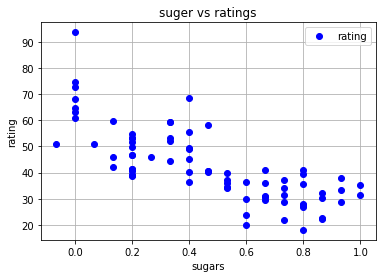

In [7]:
import matplotlib.pyplot as plt

plt.plot(X,y,'bo')
plt.ylabel('rating')
plt.xlabel('sugars')
plt.legend(['rating'])
plt.title('suger vs ratings')
plt.grid()
plt.show()

Hypothesis

In [8]:
def costfunction(x,y,theta):
   
   a = 1/(2*m)
   b = np.sum((x@theta-y)**2)
   jk = (a)*(b)
   return jk

Initilize parameters

In [51]:
m = np.size(y)
X = X.reshape([77,1])
x = np.hstack([np.ones_like(X),X])

theta = np.zeros([2,1])
print(theta,'\n',m)


[[0.]
 [0.]] 
 77


In [52]:
print(costfunction(x,y,theta))

77582.35190838983


Gradient Descend

In [53]:
def gradient(x,y,theta) :
  alpha = 0.00001
  iteration =10000

#algorithm for gradient descend
  j_history = np.zeros([iteration,1]);

  for iter in range(0,iteration) :
    error = (x @ theta) -y
    #print("err sh",error.shape)
    temp0 = theta[0] - ((alpha/m)*np.sum(error*x[:,0]))
    #print("t0",temp0)
    temp1 = theta[1] - ((alpha/m)*np.sum(error*x[:,1]))
    #print("t1",temp1)
    theta = np.array([temp0,temp1]).reshape(2,1)
    j_history[iter]= (1/(2*m)) * (np.sum(((x @ theta)-y)**2))
    #print(j_history[iter], theta)
    
  return theta, j_history


In [59]:
theta , j = gradient(x,y,theta)
print(theta, j)

[[ 52.48261469]
 [-23.8462037 ]] [[7607.37676784]
 [7607.42980414]
 [7607.48286692]
 ...
 [9449.46332096]
 [9449.77858553]
 [9450.0938763 ]]


plot line

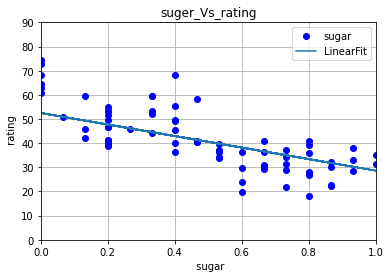

In [60]:
plt.plot(X,y,'bo')
plt.plot(X,x @ theta,'-')
plt.axis([0,1,0,90])
plt.ylabel(' rating')
plt.xlabel(' sugar')
plt.legend(['sugar','LinearFit'])
plt.title('suger_Vs_rating')
plt.grid()
plt.show()